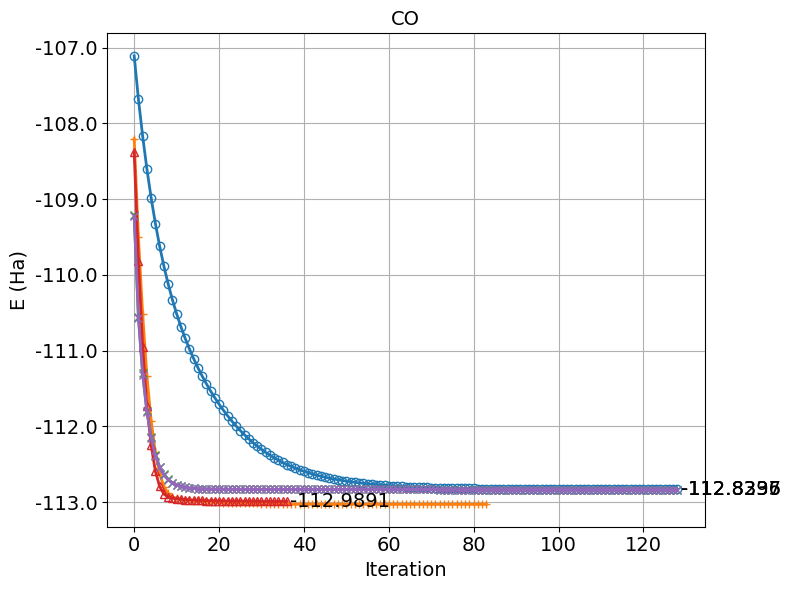

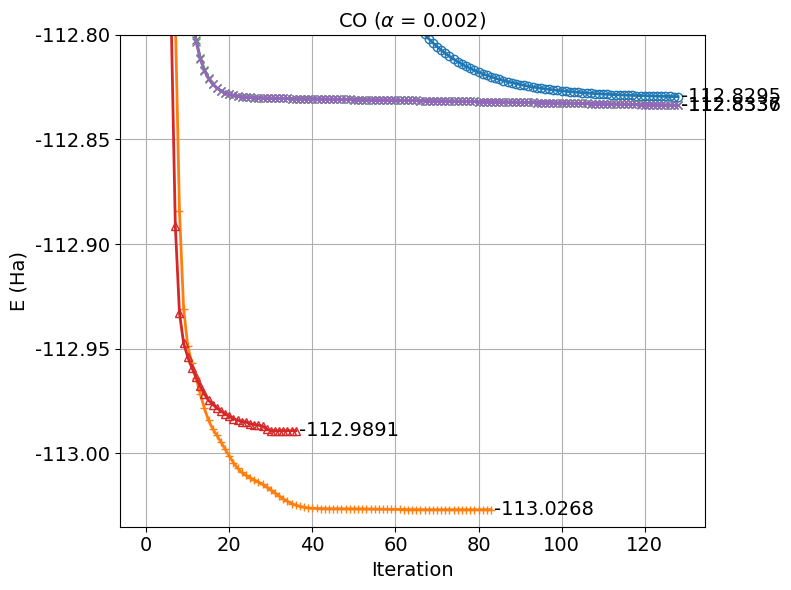

In [ ]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
import re

def format_molecule(name: str) -> str:
    # Sustitutes numbers by subindixes in LaTeX for molecule naming
    # ie H2O to H_2O
    return re.sub(r'(\d+)', r'$_{\1}$', name.upper())

################
#Select molecule data to plot
molecule = "co"
#Convert molecule name to latex format
title_str = format_molecule(molecule)
################


################
# Select alpha 0.002 or 0.02
################
alpha = "0.002"
################

# Read the data
data = defaultdict(list)  # alpha: list of (iteration, energy)

with open(f"{molecule}_{alpha}.csv", mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        alg = row['alg']
        iteration = int(row['iteration'])
        energy = float(row['energy'])
        data[alg].append((iteration, energy))

# Plot
# Paso 1: recolectar datos finales
markers = ['o', '+', 'x', '^', 'x', 'o', '+']

# Plot
final_energies = []

plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', labelsize=14)

for i, (alg, points) in enumerate(sorted(data.items())):
      # Extraer las primeras 130 iteraciones
    points = points[:129]  # <-- Selección parcial
    iterations, energies = zip(*points)
    marker = markers[i % len(markers)]
    plt.plot(iterations, energies, marker=marker, markerfacecolor='none',linewidth=2,label=f'{alg}')

    #################
    # Select  algorithm curve to show energy of the last point
    ##################
    if alg in ( 'SD', 'RMSPROP', 'CG', 'ADAGRAD'):
        last_x = iterations[-1]
        last_y = energies[-1]
        plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')


plt.xlabel('Iteration', fontsize=14)
plt.ylabel('E (Ha)', fontsize=14)
plt.title(title_str, fontsize=14)
#plt.legend(fontsize=14)
plt.grid(True)

# Optional: format Y-axis with 6 decimals
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}"))

plt.tight_layout()
plt.savefig(f"{molecule}_{alpha}.png", dpi=300)
plt.show()

# === Plot 3: Zoomed Y-axis ===
plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', labelsize=14)

for i, (alg, points) in enumerate(sorted(data.items())):
      # Extraer las primeras 130 iteraciones
    points = points[:129]  # <-- Selección parcial
    iterations, energies = zip(*points)
    marker = markers[i % len(markers)]
    plt.plot(iterations, energies, marker=marker, markerfacecolor='none', linewidth=2,label=f'{alg}')

    #################
    # Select  algorithm curve to show energy of the last point
    ##################
    if alg in ('ADAM', 'CG', 'RMSPROP', 'SD', 'ADAGRAD'):
        last_x = iterations[-1]
        last_y = energies[-1]
        plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')


plt.xlabel('Iteration', fontsize=14)
plt.ylabel('E (Ha)', fontsize=14)
plt.title(f'{title_str} ($\\alpha$ = {alpha})', fontsize=14)

################################
########## Adjust ZOOM for energy depending on the molecule
################################
# Zoom on y axis for CO
plt.ylim(-113.035, -112.8) #  Range: 125 kcal approx, alpha = 0.02 and 0.002 
# Zoom on y axis for CO2
#plt.ylim(-188.086, -187.86) # Range around 150 kcal 
# Zoom for H2O
#plt.ylim(-76.245, -76.18) # Range: 40 kcal approx

#plt.legend(fontsize=14)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.2f}"))
plt.tight_layout()
plt.savefig(f"{molecule}_{alpha}_{"zoom"}.png", dpi=300)
plt.show()